In [1]:
#import numpy as we need it for some calculations
import numpy as np

# Write a function to read the data

Read the data from the txt file and return as a 2D array where first column = x data,
second column = y data and (x,y) represents a single data point

In [2]:
def readData(fileName):

    #open the file with read access
    f = open(fileName,'r')

    data =[]
   
    #extract the data and form [x, y] data point form each line
    for line in f.readlines():
        line = line.rstrip()
        line = line.split(sep=" ")
        #as they are read as strings convert them into float and int respectively 
        line[0] = float(line[0])
        line[1] = int(line[1])
    
        data.append(line)

    return np.array(data, dtype=float)

### 2) Define the predict function

In [3]:
def predict(x,betas):
    # give x as a column vector
    # betas = list of beta_0 and beta_1

    b0 = betas[0]
    b1 = betas[1]

    ycap = b0 + b1*x

    return ycap
    #so this function will return a column vector of ycap

### 3) Define the loss function

In [4]:
def loss(x,y,betas):
    # give x anf y as column vectors

    #get prediction using predict function
    y_predicted = predict(x=x,betas=betas)

    #now calculate the residuals in prediction
    residuals = np.subtract(y,y_predicted)

    #calculate the loss
    loss = (1/(len(x)))*np.sum(residuals)

    #rerun loss
    return loss

### 4. Define the gradient function

Gradients are given as
$$ \frac{\partial L}{\partial \beta_0} = \frac{2}{n}\sum_{i=1}^{n}(\hat{y}_i - y_i) $$
And
$$ \frac{\partial L}{\partial \beta_1} = \frac{2}{n}\sum_{i=1}^{n}(\hat{y}_i - y_i)x_i $$


In [5]:
def gradient(x,y,betas):
    #give x, y in column vector form
    #first predict the ycap using predict function
    y_predicted = predict(x=x,betas=betas)

    #now calculate the gradients
    d_b0 = (2/len(x))*(np.sum(np.subtract(y_predicted, y)))

    d_b1=(2/len(x))*np.sum(np.multiply(np.subtract(y_predicted,y),x))
    
    return d_b0,d_b1

### Define the  train function

In [6]:
def train(data,lr, iterations):
    #data is a 2D numpy array
    # lr = learning rate
    # iterations = number of iterations


    #separate x data and y data 
    x = data[:,0]
    y = data[:,1]
     
    #first initialize some beta values
    beta_values = [0,0]

    #predict y values, calculate loss and update the beta values for each iteration
    for i in range(iterations):

        #predict using these beta values
        y_predicted = predict(x=x,betas=beta_values)
 
        

        #get the gradients 
        b0_gradient, b1_gradient = gradient(x,y,beta_values)
        
        #update b0
        beta_values[0] =  beta_values[0] - b0_gradient*lr

        #update b1 
        beta_values[1] = beta_values[1] - b1_gradient*lr
    
    #finally returns the betas vector with the last updated values
    return beta_values


### 6) Implement the algorithm for different values


First import the data using the ```readData()``` function

In [7]:
fileName = 'numCigsAgeAtDeath.txt'
data = readData(fileName)
#print first 5 lines to check
data[1:5,:]

array([[ 1.3, 90. ],
       [ 1.5, 89. ],
       [ 2. , 89. ],
       [ 2.2, 85. ]])

### Now apply the algorithm and test it for x = 8

1) Learning Rate = 0.01, iterations = 1000

In [8]:
# train the model and get the beta values
optimal_betas = train(data,lr=0.01,iterations=1000)
print(f'Intercept: {optimal_betas[0]},\nCoefficient: {optimal_betas[1]}')
# get the loss
print(f'Total error or loss: {loss(x=data[:,0],y=data[:,1],betas=optimal_betas)}')

#Predict y for x = 8
x_test = 8
print(f'Age at Death for {x_test} cigarettes/day:{predict(x=x_test,betas=optimal_betas)} ')


Intercept: 92.15406746303498,
Coefficient: -3.072793770088807
Total error or loss: 0.2976954951258815
Age at Death for 8 cigarettes/day:67.57171730232452 


2) Learning Rate = 0.01, iterations = 5000

In [9]:
# train the model and get the beta values
optimal_betas = train(data,lr=0.01,iterations=5000)
print(f'Intercept: {optimal_betas[0]}, \nCoefficient: {optimal_betas[1]}')
# get the loss
print(f'Total error or loss: {loss(x=data[:,0],y=data[:,1],betas=optimal_betas)}')

#Predict y for x = 8
x_test = 8
print(f'Age at Death for {x_test} cigarettes/day:{predict(x=x_test,betas=optimal_betas)} ')

#we got infinity and a warning  becasue at this learning rate
# and iterations the optimal beta values are too small.


Intercept: 93.58859029797267, 
Coefficient: -3.2988673923272045
Total error or loss: 1.7729841975519126e-08
Age at Death for 8 cigarettes/day:67.19765115935503 


3) Learning Rate = 0.01, iterations = 10000

In [10]:
# train the model and get the beta values
optimal_betas = train(data,lr=0.01,iterations=10000)
print(f'Intercept: {optimal_betas[0]}, \nCoefficient: {optimal_betas[1]}')
# get the loss
print(f'Total error or loss: {loss(x=data[:,0],y=data[:,1],betas=optimal_betas)}')

#Predict y for x = 8
x_test = 8
print(f'Age at Death for {x_test} cigarettes/day:{predict(x=x_test,betas=optimal_betas)} ')

#we got infinity and a warning  becasue at this learning rate
# and iterations the optimal beta values are too small.

Intercept: 93.58859038340687, 
Coefficient: -3.2988674057912086
Total error or loss: 3.5400254156619276e-13
Age at Death for 8 cigarettes/day:67.1976511370772 


4) Learning Rate = 0.001, iterations = 1000

In [11]:
# train the model and get the beta values
optimal_betas = train(data,lr=0.001,iterations=1000)
print(f'Intercept: {optimal_betas[0]}, \nCoefficient: {optimal_betas[1]}')
# get the loss
print(f'Total error or loss: {loss(x=data[:,0],y=data[:,1],betas=optimal_betas)}')

#Predict y for x = 8
x_test = 8
print(f'Age at Death for {x_test} cigarettes/day:{predict(x=x_test,betas=optimal_betas)} ')


Intercept: 32.95890820992071, 
Coefficient: 6.256067190086572
Total error or loss: 12.582011062786815
Age at Death for 8 cigarettes/day:83.00744573061328 


5) Learning Rate = 0.001, iterations = 5000

In [12]:
# train the model and get the beta values
optimal_betas = train(data,lr=0.001,iterations=5000)
print(f'Intercept: {optimal_betas[0]}, \nCoefficient: {optimal_betas[1]}')
# get the loss
print(f'Total error or loss: {loss(x=data[:,0],y=data[:,1],betas=optimal_betas)}')

#Predict y for x = 8
x_test = 8
print(f'Age at Death for {x_test} cigarettes/day:{predict(x=x_test,betas=optimal_betas)} ')

Intercept: 82.06655223087886, 
Coefficient: -1.483051834738159
Total error or loss: 2.391079852375885
Age at Death for 8 cigarettes/day:70.20213755297358 


6) Learning Rate = 0.001, iterations = 10000

In [13]:
# train the model and get the beta values
optimal_betas = train(data,lr=0.001,iterations=10000)
print(f'Intercept: {optimal_betas[0]}, \nCoefficient: {optimal_betas[1]}')
# get the loos
print(f'Total error or loss: {loss(x=data[:,0],y=data[:,1],betas=optimal_betas)}')

#Predict y for x = 8
x_test = 8
print(f'Age at Death for {x_test} cigarettes/day:{predict(x=x_test,betas=optimal_betas)} ')

Intercept: 92.142869912192, 
Coefficient: -3.0710290920944123
Total error or loss: 0.30001923662561886
Age at Death for 8 cigarettes/day:67.57463717543669 


### Make a plot to observe the effect of learning rate at the same number of iterations

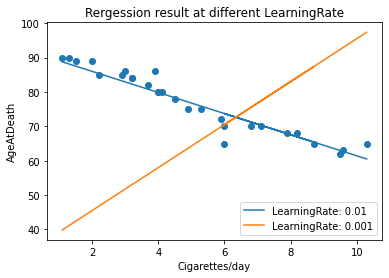

In [14]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)

#first plot the original data
x = data[:,0]
y = data[:,1]

plt.scatter(x,y)

#plot the predicted line when learning rate = 0.01
y_pred1 = predict(x=x,betas=train(data,lr=0.01,iterations=1000))
plt.plot(x,y_pred1, label = 'LearningRate: 0.01')

#plot the predicted line when learning rate = 0.001
y_pred2 = predict(x=x,betas=train(data,lr=0.001,iterations=1000))
plt.plot(x,y_pred2, label = 'LearningRate: 0.001')
plt.legend()
plt.title('Rergession result at different LearningRate')
plt.xlabel('Cigarettes/day')
plt.ylabel('AgeAtDeath')
plt.show()

So, here we observed that, learning rate 0.01 yield the best fit, while at learning rate 0.001, the regression line is too diversed.

### Make a plot to observe the effect of different iterations at same learning rate

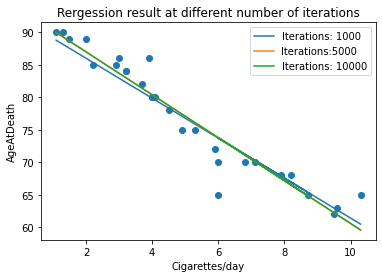

In [15]:
#first plot the original data
plt.scatter(x,y)

#plot the predicted line for 1000 iterations
y_pred1 = predict(x=x,betas=train(data,lr=0.01,iterations=1000))
plt.plot(x,y_pred1, label = 'Iterations: 1000')

#plot the predicted line for 5000 iterations
y_pred2 = predict(x=x,betas=train(data,lr=0.01,iterations=5000))
plt.plot(x,y_pred2, label = 'Iterations:5000')

#plot the predicted line for 10000 iterations
y_pred3 = predict(x=x,betas=train(data,lr=0.01,iterations=10000))
plt.plot(x,y_pred3, label = 'Iterations: 10000')
plt.legend()
plt.title('Rergession result at different number of iterations')
plt.xlabel('Cigarettes/day')
plt.ylabel('AgeAtDeath')
plt.show()

So we observed that, there is not much difference in the regression line for different number of iterations, when learning rate is same.

So, we can choose the model at lr = 0.01 and iterations = 1000

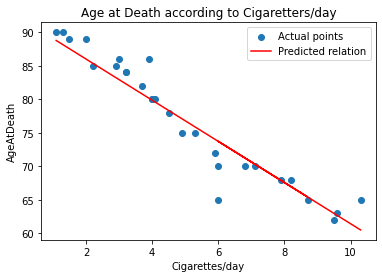

In [16]:
#first plot the original data
plt.scatter(x,y,label = 'Actual points')

#plot the predicted line for 1000 iterations
y_pred1 = predict(x=x,betas=train(data,lr=0.01,iterations=1000))
plt.plot(x,y_pred1, 'r', label = 'Predicted relation')
plt.title('Age at Death according to Cigaretters/day')
plt.xlabel('Cigarettes/day')
plt.ylabel('AgeAtDeath')
plt.legend()
plt.show()
plt.show()